In [12]:
# --------------------------
# Step 1: Import Dependencies
# --------------------------

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope # Mahalanobis Distance
from sklearn.svm import OneClassSVM

import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')


In [13]:
%cd '/Users/trangtran/Library/CloudStorage/OneDrive-NortheasternUniversity/MPSA/ALY6020 - Predictive Analytics/M4/Assignment Data'

# ----------------------------------------
# Step 2: Load Redfin Dataset
# ----------------------------------------
redfin = pd.read_csv('redfin_health_pop_clean.csv')

redfin

/Users/trangtran/Library/CloudStorage/OneDrive-NortheasternUniversity/MPSA/ALY6020 - Predictive Analytics/M4/Assignment Data


,Unnamed: 0,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,LATITUDE,...,PRICE_cat2,PROPERTY TYPE_Condo/Co-op,PROPERTY TYPE_Mobile/Manufactured Home,PROPERTY TYPE_Multi-Family (2-4 Unit),PROPERTY TYPE_Multi-Family (5+ Unit),PROPERTY TYPE_Single Family Residential,PROPERTY TYPE_Townhouse,STATE OR PROVINCE_ME,STATE OR PROVINCE_NH,STATE OR PROVINCE_VT
0,353,246000,3.0,2.0,1757.0,304920.0,1990.0,3,140.0,44.652725,...,Low,0,0,0,0,1,0,1,0,0
1,355,105000,1.0,1.0,468.0,39639.0,2013.0,4,224.0,45.221966,...,Low,0,0,0,0,1,0,1,0,0
2,359,799000,3.0,2.5,1912.0,21780.0,2013.0,5,418.0,44.516333,...,High,0,0,0,0,1,0,1,0,0
3,360,500000,3.0,2.0,2000.0,95832.0,1920.0,6,250.0,44.472038,...,High,0,0,0,0,1,0,1,0,0
4,363,450000,3.0,2.0,1944.0,945252.0,1986.0,7,231.0,44.741464,...,High,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2638,6402,1750000,5.0,6.0,5423.0,43560.0,2022.0,144,323.0,43.872946,...,High,0,0,1,0,0,0,0,1,0
2639,6403,1100000,3.0,2.5,2248.0,1368219.0,2008.0,145,489.0,44.248878,...,High,0,0,0,0,1,0,0,1,0
2640,6407,7000000,4.0,3.5,4134.0,187308.0,1984.0,149,1693.0,43.732042,...,High,0,0,0,0,1,0,0,1,0
2641,6411,260000,4.0,2.0,2333.0,9147.0,1890.0,154,111.0,43.865578,...,Low,0,0,0,0,1,0,0,1,0


In [14]:
# remove 1st column
redfin = redfin.drop(redfin.columns[0], axis=1)
redfin

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,LATITUDE,LONGITUDE,...,PRICE_cat2,PROPERTY TYPE_Condo/Co-op,PROPERTY TYPE_Mobile/Manufactured Home,PROPERTY TYPE_Multi-Family (2-4 Unit),PROPERTY TYPE_Multi-Family (5+ Unit),PROPERTY TYPE_Single Family Residential,PROPERTY TYPE_Townhouse,STATE OR PROVINCE_ME,STATE OR PROVINCE_NH,STATE OR PROVINCE_VT
0,246000,3.0,2.0,1757.0,304920.0,1990.0,3,140.0,44.652725,-67.448621,...,Low,0,0,0,0,1,0,1,0,0
1,105000,1.0,1.0,468.0,39639.0,2013.0,4,224.0,45.221966,-67.572723,...,Low,0,0,0,0,1,0,1,0,0
2,799000,3.0,2.5,1912.0,21780.0,2013.0,5,418.0,44.516333,-67.584001,...,High,0,0,0,0,1,0,1,0,0
3,500000,3.0,2.0,2000.0,95832.0,1920.0,6,250.0,44.472038,-67.924914,...,High,0,0,0,0,1,0,1,0,0
4,450000,3.0,2.0,1944.0,945252.0,1986.0,7,231.0,44.741464,-68.014730,...,High,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2638,1750000,5.0,6.0,5423.0,43560.0,2022.0,144,323.0,43.872946,-71.604668,...,High,0,0,1,0,0,0,0,1,0
2639,1100000,3.0,2.5,2248.0,1368219.0,2008.0,145,489.0,44.248878,-72.047087,...,High,0,0,0,0,1,0,0,1,0
2640,7000000,4.0,3.5,4134.0,187308.0,1984.0,149,1693.0,43.732042,-71.552684,...,High,0,0,0,0,1,0,0,1,0
2641,260000,4.0,2.0,2333.0,9147.0,1890.0,154,111.0,43.865578,-71.637720,...,Low,0,0,0,0,1,0,0,1,0


In [19]:
# --------------------------------
# Step 3: Preprocess the Data
# --------------------------------

# ---------------------------------
# Define predictors and response
# ---------------------------------
predictors = redfin.drop(columns = ['PRICE_cat2', 'PRICE', "Geolocation"])
response_num = redfin['PRICE']
response_cat = redfin['PRICE_cat2']

# ---------------------------------
# # # Scale the predictors
# ---------------------------------
scaler = StandardScaler()
predictors_scaled = scaler.fit_transform(predictors)

predictors_scaled


array([[-0.22311319, -0.13210525, -0.27495639, ...,  0.4210497 ,
        -0.42042679, -0.01945511],
       [-1.18665596, -0.77158177, -1.08907774, ...,  0.4210497 ,
        -0.42042679, -0.01945511],
       [-0.22311319,  0.18763301, -0.17705972, ...,  0.4210497 ,
        -0.42042679, -0.01945511],
       ...,
       [ 0.25865819,  0.82710952,  1.22633645, ..., -2.37501653,
         2.37853542, -0.01945511],
       [ 0.25865819, -0.13210525,  0.08884028, ..., -2.37501653,
         2.37853542, -0.01945511],
       [-0.22311319, -0.77158177, -0.70254379, ..., -2.37501653,
         2.37853542, -0.01945511]])

In [21]:

# --------------------------------
# Step 4: Apply Outlier Detection Methods
# --------------------------------

# --------------------------------
# Local Outlier Factor
# --------------------------------
lof = LocalOutlierFactor(n_neighbors=5, contamination=0.05)
predictors['Outlier_LOF'] = lof.fit_predict(predictors_scaled)

# --------------------------------
# Isolation Forest
# --------------------------------
iforest = IsolationForest(n_estimators=100, contamination=0.05)
predictors['Outlier_IForest'] = iforest.fit_predict(predictors_scaled)

# --------------------------------
# Robust Covariance
# --------------------------------
rob_cov = EllipticEnvelope(contamination=0.05)
rob_cov.fit(predictors_scaled)
predictors['Outlier_RobustCov'] = rob_cov.predict(predictors_scaled)

# --------------------------------
# One-Class SVM
# --------------------------------
ocsvm = OneClassSVM(kernel='rbf', gamma=0.1, nu=0.05)
predictors['Outlier_OCSVM'] = ocsvm.fit_predict(predictors_scaled)



   BEDS  BATHS  SQUARE FEET  LOT SIZE  YEAR BUILT  DAYS ON MARKET  \
0   3.0    2.0       1757.0  304920.0      1990.0               3   
1   1.0    1.0        468.0   39639.0      2013.0               4   
2   3.0    2.5       1912.0   21780.0      2013.0               5   
3   3.0    2.0       2000.0   95832.0      1920.0               6   
4   3.0    2.0       1944.0  945252.0      1986.0               7   

   $/SQUARE FEET   LATITUDE  LONGITUDE  LocationID  ...  \
0          140.0  44.652725 -67.448621      4654.0  ...   
1          224.0  45.221966 -67.572723      4668.0  ...   
2          418.0  44.516333 -67.584001      4611.0  ...   
3          250.0  44.472038 -67.924914      4680.0  ...   
4          231.0  44.741464 -68.014730      4622.0  ...   

   PROPERTY TYPE_Single Family Residential  PROPERTY TYPE_Townhouse  \
0                                        1                        0   
1                                        1                        0   
2                

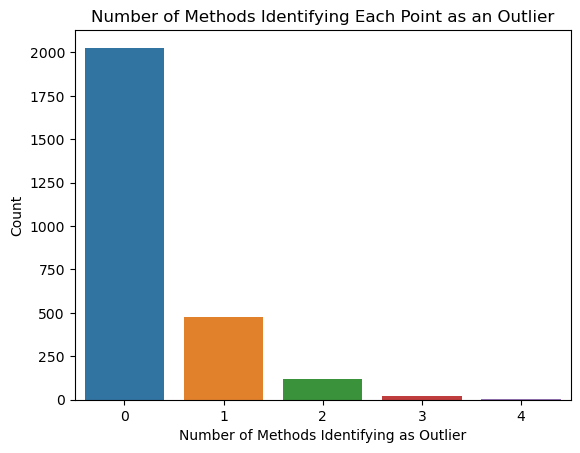

In [22]:
# ----------------------------------------------------------------
# Step 5: Add Summation Column
# Detecting outliers with OCSVM
# ----------------------------------------------------------------

outlier_columns = ['Outlier_LOF', 'Outlier_IForest', 'Outlier_RobustCov', 'Outlier_OCSVM']
predictors['Outlier_Sum'] = predictors[outlier_columns].apply(lambda row: sum([1 for val in row if val == -1]), axis=1)

# Displaying the first few rows of the DataFrame
print(predictors.head())

# Optional: Plotting the results
sns.countplot(x='Outlier_Sum', data=predictors)
plt.title('Number of Methods Identifying Each Point as an Outlier')
plt.xlabel('Number of Methods Identifying as Outlier')
plt.ylabel('Count')
plt.show()


In [23]:
predictors['Outlier_Sum'].value_counts()

0    2027
1     476
2     117
3      20
4       3
Name: Outlier_Sum, dtype: int64

In [27]:
import plotly.express as px

# Using three features for the 3D plot
features_to_plot = ['SQUARE FEET', 'YEAR BUILT', 'LocationID']

predictors['Outlier_Sum_Cat'] = pd.Categorical(predictors['Outlier_Sum'])

# Create a 3D scatter plot using Plotly
fig = px.scatter_3d(predictors, x='SQUARE FEET', y='YEAR BUILT', z='LocationID', color='Outlier_Sum_Cat', 
                    title='3D Scatter Plot of Redfin Housing Data with Outliers Highlighted',
                    color_continuous_scale=px.colors.sequential.Viridis)

fig.show()

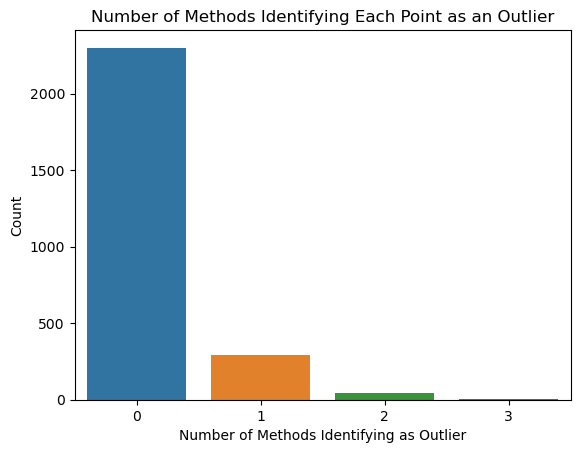

In [28]:
# ----------------------------------------------------------------
# Detecting outliers without OCSVM
# ----------------------------------------------------------------

outlier_columns = ['Outlier_LOF', 'Outlier_IForest', 'Outlier_RobustCov']
predictors['Outlier_Sum'] = predictors[outlier_columns].apply(lambda row: sum([1 for val in row if val == -1]), axis=1)

# Optional: Plotting the results
sns.countplot(x='Outlier_Sum', data=predictors)
plt.title('Number of Methods Identifying Each Point as an Outlier')
plt.xlabel('Number of Methods Identifying as Outlier')
plt.ylabel('Count')
plt.show()

In [29]:
predictors['Outlier_Sum'].value_counts()

0    2299
1     293
2      47
3       4
Name: Outlier_Sum, dtype: int64

In [30]:
import plotly.express as px

# Using three features for the 3D plot
features_to_plot = ['SQUARE FEET', 'YEAR BUILT', 'LocationID']

predictors['Outlier_Sum_Cat'] = pd.Categorical(predictors['Outlier_Sum'])

# Create a 3D scatter plot using Plotly
fig = px.scatter_3d(predictors, x='SQUARE FEET', y='YEAR BUILT', z='LocationID', color='Outlier_Sum_Cat', 
                    title='3D Scatter Plot of Redfin Housing Data with Outliers Highlighted',
                    color_continuous_scale=px.colors.sequential.Viridis)

fig.show()